In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train_df = pd.read_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\DS projects\\churn\\fraudTrain.csv')
test_df = pd.read_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\DS projects\\churn\\fraudTest.csv')

In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
print(train_df.shape[0])
print(test_df.shape[0])

1296675
555719


In [6]:
df = pd.concat([train_df, test_df])

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
fraud = df[df['is_fraud'] == 1]
not_fraud = df[df['is_fraud'] == 0]
print(fraud.shape)
print(not_fraud.shape)

(9651, 23)
(1842743, 23)


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
cols_to_drop = ['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'trans_date_trans_time']
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
df.shape

(1852394, 11)

In [14]:
df.duplicated().sum()

48261

In [15]:
df.drop_duplicates()

,category,amt,gender,city,state,zip,lat,long,city_pop,dob,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1988-03-09,0
1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,1978-06-21,0
2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,1962-01-19,0
3,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,1967-01-12,0
4,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,1986-03-28,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,M,Luray,MO,63453,40.4931,-91.8912,519,1966-02-13,0
555715,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,1999-12-27,0
555716,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,1981-11-29,0
555717,travel,7.99,M,Mesa,ID,83643,44.6255,-116.4493,129,1965-12-15,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   category  object 
 1   amt       float64
 2   gender    object 
 3   city      object 
 4   state     object 
 5   zip       int64  
 6   lat       float64
 7   long      float64
 8   city_pop  int64  
 9   dob       object 
 10  is_fraud  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 169.6+ MB


In [18]:
from datetime import datetime
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = datetime.now().year - df['dob'].dt.year
df.drop(columns=['dob'], inplace=True)
print(df.head())

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop  is_fraud  age  
0  -81.1781      3495         0   36  
1 -118.2105       149         0   46  
2 -112.2620      4154         0   62  
3 -112.1138      1939         0   57  
4  -79.4629        99         0   38  


In [19]:
df.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,is_fraud,age
0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,0,36
1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,0,46
2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,0,62
3,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,0,57
4,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,0,38


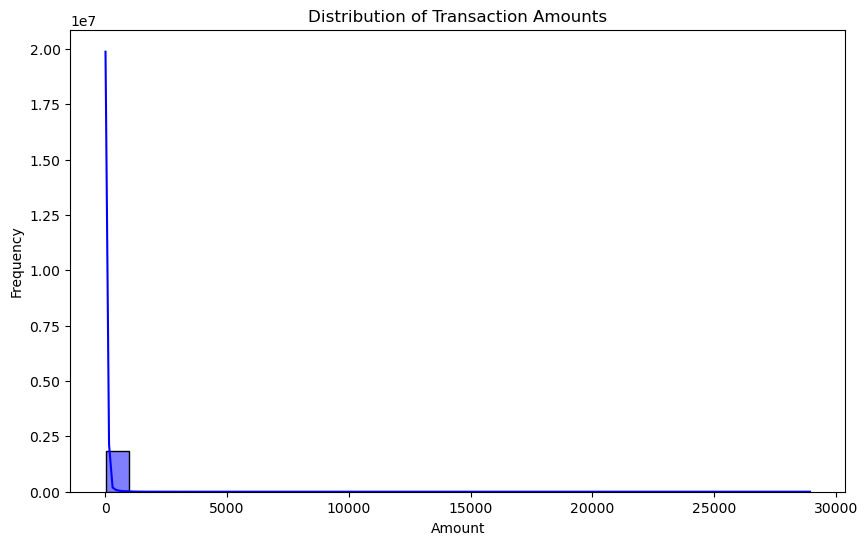

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_9180\2287683059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette='viridis')


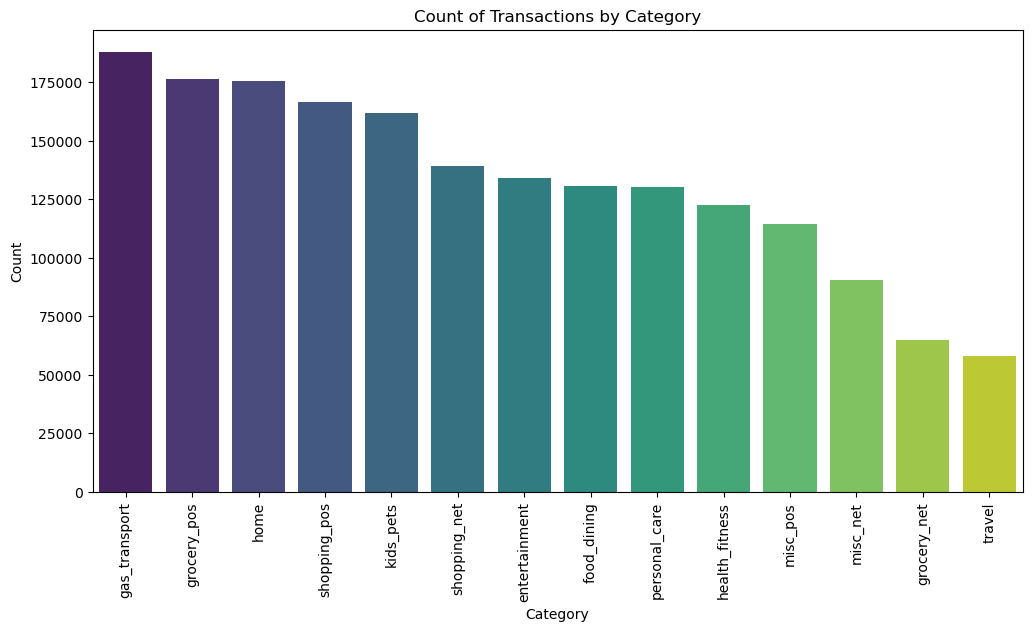

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette='viridis')
plt.title('Count of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

numeric_columns = df.select_dtypes(include=['int64', 'int32', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(encoder.fit_transform)

In [23]:
df

,category,amt,gender,city,state,zip,lat,long,city_pop,is_fraud,age
0,8,4.97,0,532,27,28654,36.0788,-81.1781,3495,0,36
1,4,107.23,0,619,47,99160,48.8878,-118.2105,149,0,46
2,0,220.11,1,474,13,83252,42.1808,-112.2620,4154,0,62
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,0,57
4,9,41.96,1,217,45,24433,38.4207,-79.4629,99,0,38
...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,471,24,63453,40.4931,-91.8912,519,0,58
555715,7,111.84,1,427,43,77566,29.0393,-95.4401,28739,0,25
555716,7,86.88,0,110,47,99323,46.1966,-118.9017,3684,0,43
555717,13,7.99,1,508,13,83643,44.6255,-116.4493,129,0,59


In [24]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
columns = df.columns.tolist()
columns.remove('is_fraud')
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

print(df)


        category       amt    gender      city     state       zip       lat  \
0       0.452162 -0.408741 -0.908554  0.311413  0.023231 -0.749921 -0.485167   
1      -0.570001  0.233378 -0.908554  0.642985  1.418957  1.872891  2.040531   
2      -1.592163  0.942184  1.100650  0.090365 -0.953778  1.281116  0.718034   
3      -1.081082 -0.157381  1.100650 -1.395991 -0.046555  0.402455  1.516580   
4       0.707702 -0.176470  1.100650 -0.889105  1.279385 -0.906942 -0.023388   
...          ...       ...       ...       ...       ...       ...       ...   
555714 -0.314460 -0.165105  1.100650  0.078932 -0.186128  0.544596  0.385251   
555715  0.196621  0.262326  1.100650 -0.088760  1.139812  1.069597 -1.873227   
555716  0.196621  0.105595 -0.908554 -1.296901  1.418957  1.878954  1.509876   
555717  1.729865 -0.389777  1.100650  0.219945 -0.953778  1.295661  1.200084   
555718 -1.592163 -0.200520  1.100650 -0.805260  0.651308  0.901008 -0.566465   

            long  city_pop  is_fraud   

In [ ]:
# # Model Training using LogisticRegression
log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy of model:", accuracy_score(y_test, y_pred))

In [ ]:
# Model Training using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy of model:", accuracy_score(y_test, y_pred))

In [ ]:
# Model Training using Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy of model:", accuracy_score(y_test, y_pred))